# Introduction

In this notebook we review prediction of adult income from US census data. 

We will use two popular libraries - sklearn and keras.

* sklearn will be used to demonstrate the use of non-neural-net algorithms
* keras will be used to demonstrate the use of neural network algorithms



# DISCLOSURE

Most of this work is not my own is based from work done by 
* Elton Paes on Kaggle Source - https://www.kaggle.com/eltonpaes/adult-salary-prediction
* https://www.kaggle.com/overload10/income-prediction-on-uci-adult-dataset

# Loading the data

In [38]:
import numpy as np
import pandas as pd

In [39]:
df  = pd.read_csv('adult.csv')

In [6]:
# import the data
df  = pd.read_csv('adult.csv')
data = [df]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [93]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Exploratory Data Analysis

In [23]:
df.groupby(['salary','marital-status'])['age'].count()

salary  marital-status        
 <=50K   Divorced                  3980
         Married-AF-spouse           13
         Married-civ-spouse        8284
         Married-spouse-absent      384
         Never-married            10192
         Separated                  959
         Widowed                    908
 >50K    Divorced                   463
         Married-AF-spouse           10
         Married-civ-spouse        6692
         Married-spouse-absent       34
         Never-married              491
         Separated                   66
         Widowed                     85
Name: age, dtype: int64

In [27]:
x = df.groupby(['salary','marital-status']).agg({'age': 'count'})
y = x.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
y

age
salary marital-status                   
 <=50K  Divorced               16.100324
        Married-AF-spouse       0.052589
        Married-civ-spouse     33.511327
        Married-spouse-absent   1.553398
        Never-married          41.229773
        Separated               3.879450
        Widowed                 3.673139
 >50K   Divorced                5.904859
        Married-AF-spouse       0.127535
        Married-civ-spouse     85.346257
        Married-spouse-absent   0.433618
        Never-married           6.261956
        Separated               0.841729
        Widowed                 1.084045

In [28]:
df.groupby(['occupation'])['age'].count()

occupation
 ?                    1843
 Adm-clerical         3770
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
Name: age, dtype: int64

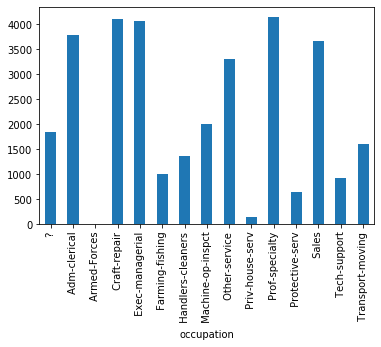

In [14]:
df.groupby(['occupation'])['age'].count().plot.bar()

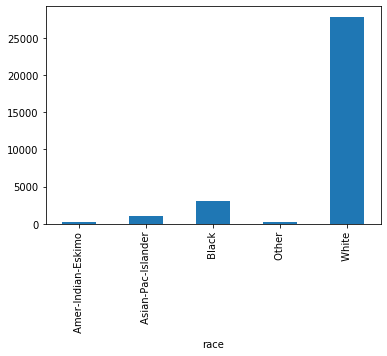

In [96]:
df.groupby(['race'])['age'].count().plot.bar()

In [52]:
## Loading the data

df  = pd.read_csv('adult.csv')
data = [df]

## Looking at our target data

In [53]:
set(df["salary"])

{' <=50K', ' >50K'}

## Data Pre-Processing

In [54]:
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

In [55]:
salary_map={' <=50K':1,' >50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)

In [56]:
df['salary']

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: salary, Length: 32561, dtype: int64

In [57]:
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

In [58]:
for dataset in data:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'
    
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)

In [59]:
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

In [60]:
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})

In [61]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)

In [62]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}


df['race']= df['race'].map(race_map)

In [63]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)

In [64]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,private


In [65]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

df['employment_type'] = df['employment_type'].map(employment_map)

In [66]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,14084,0,50,1,0,1
9,42,159449,13,0,2,0,1,5178,0,40,1,0,1


## Data Preparation for Machine Learning

In [67]:
from sklearn.model_selection import train_test_split

X= df.drop(['salary'],axis=1)
y=df['salary']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=25)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=55)

In [68]:
X_train

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,employment_type
13549,57,315460,15,0,2,0,1,0,0,36,1,2
3922,22,73203,9,1,4,0,0,0,0,40,1,1
17381,21,65038,9,1,4,0,1,0,0,40,1,1
16689,31,47276,13,0,2,0,1,0,0,38,1,0
27982,66,175558,4,1,3,0,0,0,0,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2987,46,155664,10,1,3,0,1,0,0,40,1,1
20744,49,201080,10,1,3,0,1,0,0,55,1,2
31023,23,234302,9,1,3,3,1,0,0,40,1,1
4030,29,329426,9,1,3,0,1,0,0,40,1,0


In [69]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (18233, 12)(18233,)
Validation dataset: (4559, 12)(4559,)
Test dataset: (9769, 12)(9769,)


## Select Algorithms from sklearn

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [114]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

In [115]:
print (models)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=Fal

## Training Phase

In [77]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

### Only Logistic Regression

In [73]:
clf = LogisticRegression().fit(X_train,y_train)

In [74]:
clf.coef_

array([[ 6.93354768e-03,  3.62901219e-06,  1.69084790e-03,
         7.51359018e-04,  1.41171755e-03,  2.94231048e-04,
        -2.05927384e-05, -3.27363748e-04, -7.69671281e-04,
         8.17033487e-03,  3.10901745e-04,  4.77946464e-04]])

In [135]:
import numpy as np

In [138]:
X_train.columns.to_list()

['age',
 'fnlwgt',
 'education-num',
 'marital-status',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'country',
 'employment_type']

In [140]:
imp_df = pd.DataFrame(list(zip(X_train.columns.to_list(),clf.feature_importances_)), columns=['feature','importance'])

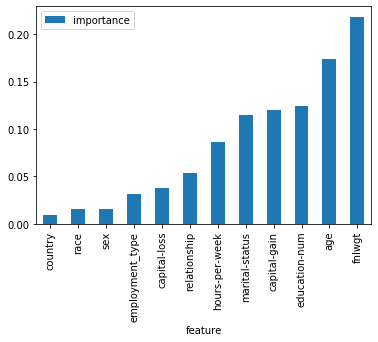

In [144]:
imp_df.sort_values('importance').plot.bar('feature')

In [75]:
predictions = clf.predict(X_val)

In [78]:
accuracy_score(y_val,predictions)

0.7984207062952402

In [79]:
predictions = clf.predict(X_test)

In [80]:
accuracy_score(y_test,predictions)

0.8018220902855973

### Using multiple models at the same time

In [145]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))
    

/Users/sddorair/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


----------------------------------------
LR: 0.7984207062952402
----------------------------------------
Random Forest: 0.8442640930028515


/Users/sddorair/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sddorair/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sddorair/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sddorair/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

----------------------------------------
Neural Network: 0.7924983549023908
----------------------------------------
GaussianNB: 0.794033779337574
----------------------------------------
DecisionTreeClassifier: 0.8010528624698399
----------------------------------------
SVM: 0.7933757402939241


## Prediction Phase

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [146]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [147]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8520831200737026
----------------------------------------
Confusion Matrix:
[[1456  850]
 [ 595 6868]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2306
           1       0.89      0.92      0.90      7463

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

